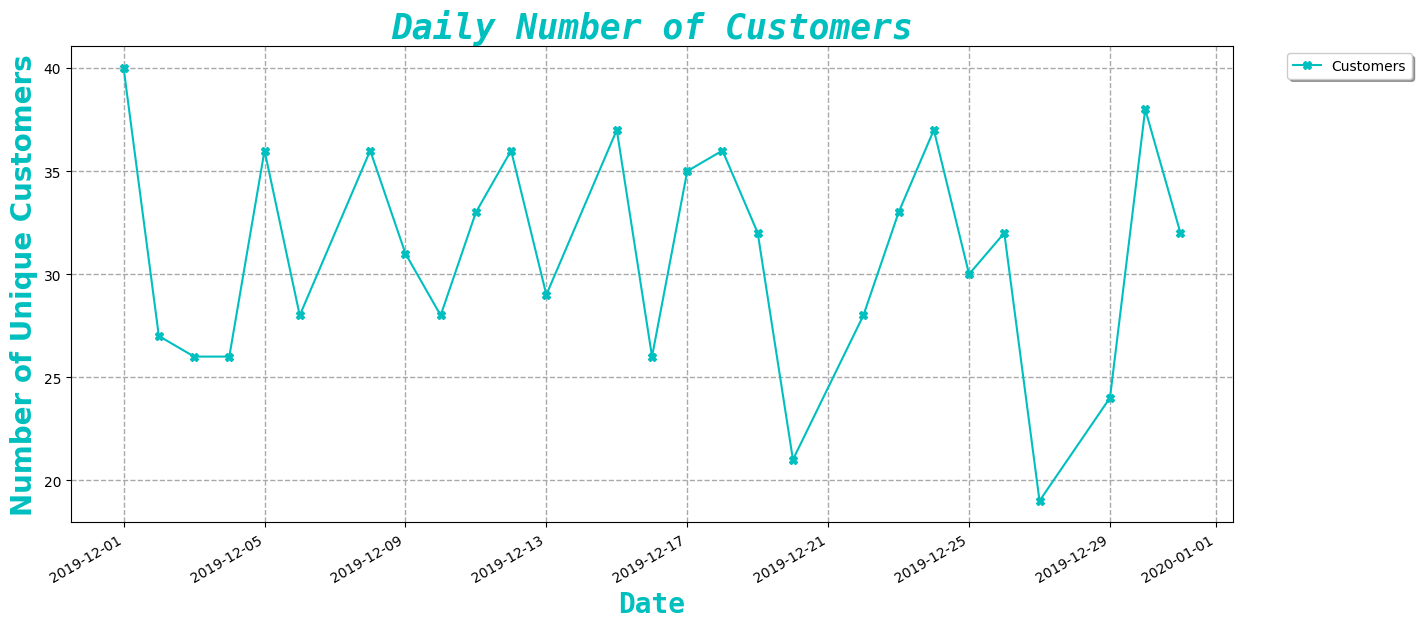

In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv')
df['order_date'] = pd.to_datetime(df['order_date'])
df['order_month'] = df['order_date'].dt.to_period('M')
df_december = df[df['order_month'] == '2019-12']
daily_customers = df_december.groupby('order_date')['customer_id'].nunique()

plt.figure(figsize=(15, 7))
daily_customers.plot(kind='line',
                     color='c',
                     marker='X',
                     label='Customers')
alignment = {'horizontalalignment': 'center'}
plt.grid(color='darkgray', linestyle='dashed', linewidth=1.0)
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=5)

plt.title('Daily Number of Customers', fontstyle='oblique', fontsize=25, color='c', weight='semibold', family='monospace')
plt.xlabel('Date', fontsize=20, color='c', weight='semibold', family='monospace')
plt.ylabel('Number of Unique Customers', fontsize=20, color='c', weight='semibold')

plt.show()

CASE 1

In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv')
df['order_date'] = pd.to_datetime(df['order_date'])
dec_data = df[(df['order_date'].dt.year == 2019) & (df['order_date'].dt.month == 12)]

top5_brands = dec_data.groupby('brand')['quantity'].sum().nlargest(5)
dataset_top5brand_dec = dec_data[dec_data['brand'].isin(top5_brands.index)]
print(top5_brands)

brand
BRAND_S    2197
BRAND_P    2194
BRAND_R    1508
BRAND_C    1365
BRAND_A    1315
Name: quantity, dtype: int64


CASE 2

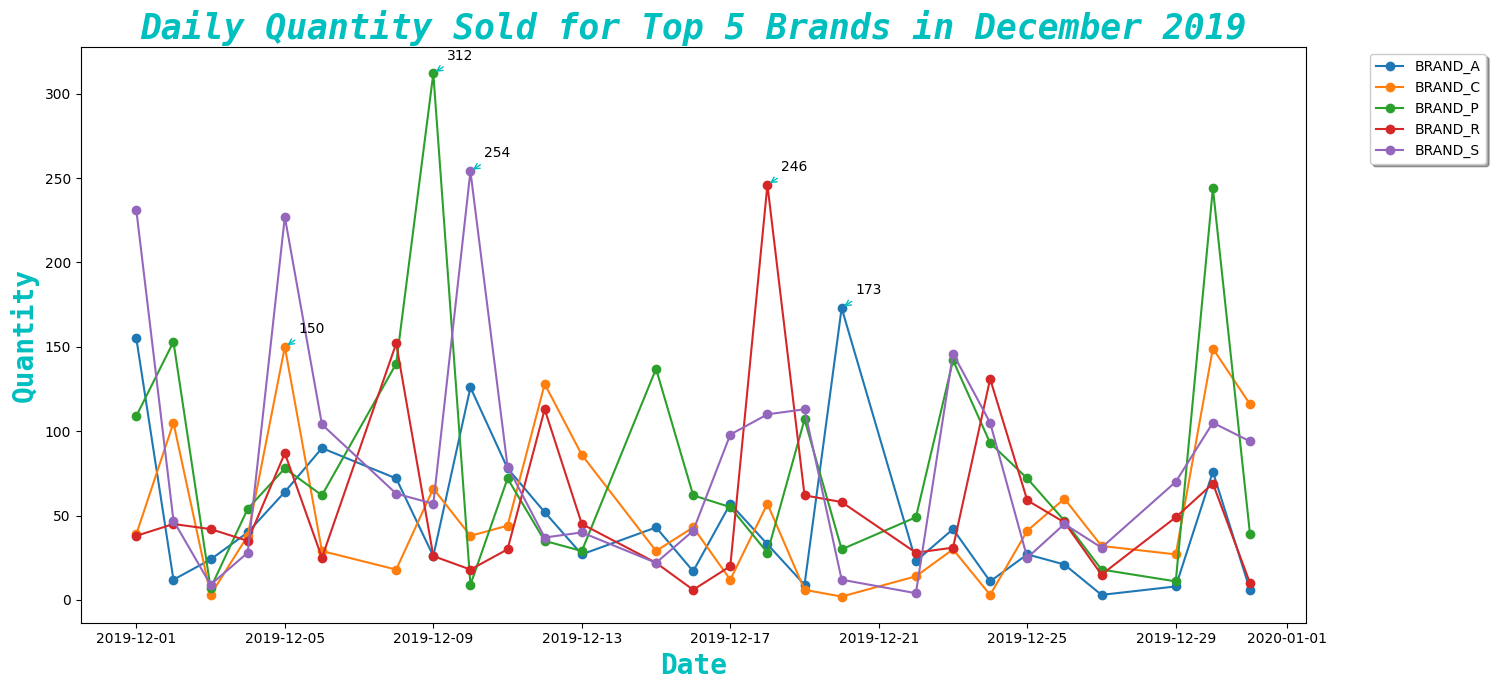

In [ ]:
import matplotlib.pyplot as plt

dec_top5_brand_data = df[(df['order_date'].dt.year == 2019) & (df['order_date'].dt.month == 12) & (df['brand'].isin(top5_brands.index))]

daily_quantity = dec_top5_brand_data.groupby(['order_date', 'brand'])['quantity'].sum().unstack()

max_quantity_date = daily_quantity.idxmax()

plt.figure(figsize=(15, 7))
for brand in daily_quantity.columns:
    plt.plot(daily_quantity.index, daily_quantity[brand], marker='o', label=brand)

for brand in daily_quantity.columns:
    max_quantity = daily_quantity.loc[max_quantity_date[brand], brand]
    plt.annotate(f'{max_quantity}', (max_quantity_date[brand], max_quantity), xytext=(10, 10),
                 textcoords='offset points', arrowprops=dict(arrowstyle='->', color='c'))

plt.title('Daily Quantity Sold for Top 5 Brands in December 2019', fontstyle='oblique', fontsize=25, color='c', weight='semibold', family='monospace')
plt.xlabel('Date', fontsize=20, color='c', weight='heavy', family='monospace')
plt.ylabel('Quantity', fontsize=20, color='c', weight='heavy', family='monospace')
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True)
plt.tight_layout()
plt.show()

CASE 3

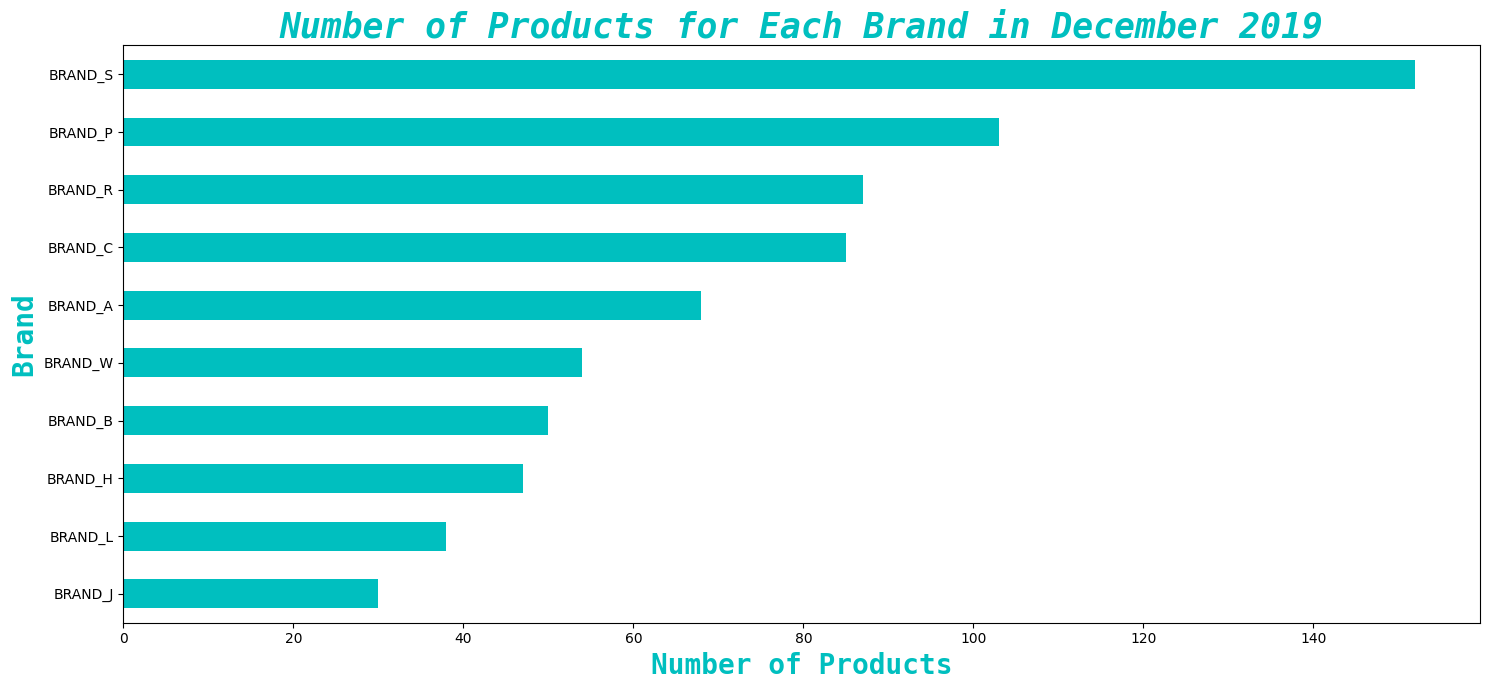

In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv')

brand_product_count = dec_data.groupby('brand')['product_id'].nunique().sort_values()

plt.figure(figsize=(15, 7))
brand_product_count.plot(kind='barh', color='c')
plt.title('Number of Products for Each Brand in December 2019', fontstyle='oblique', fontsize=25, color='c', weight='semibold', family='monospace')
plt.xlabel('Number of Products', fontsize=20, color='c', weight='heavy', family='monospace')
plt.ylabel('Brand', fontsize=20, color='c', weight='heavy', family='monospace')
plt.tight_layout()
plt.show()

CASE 4

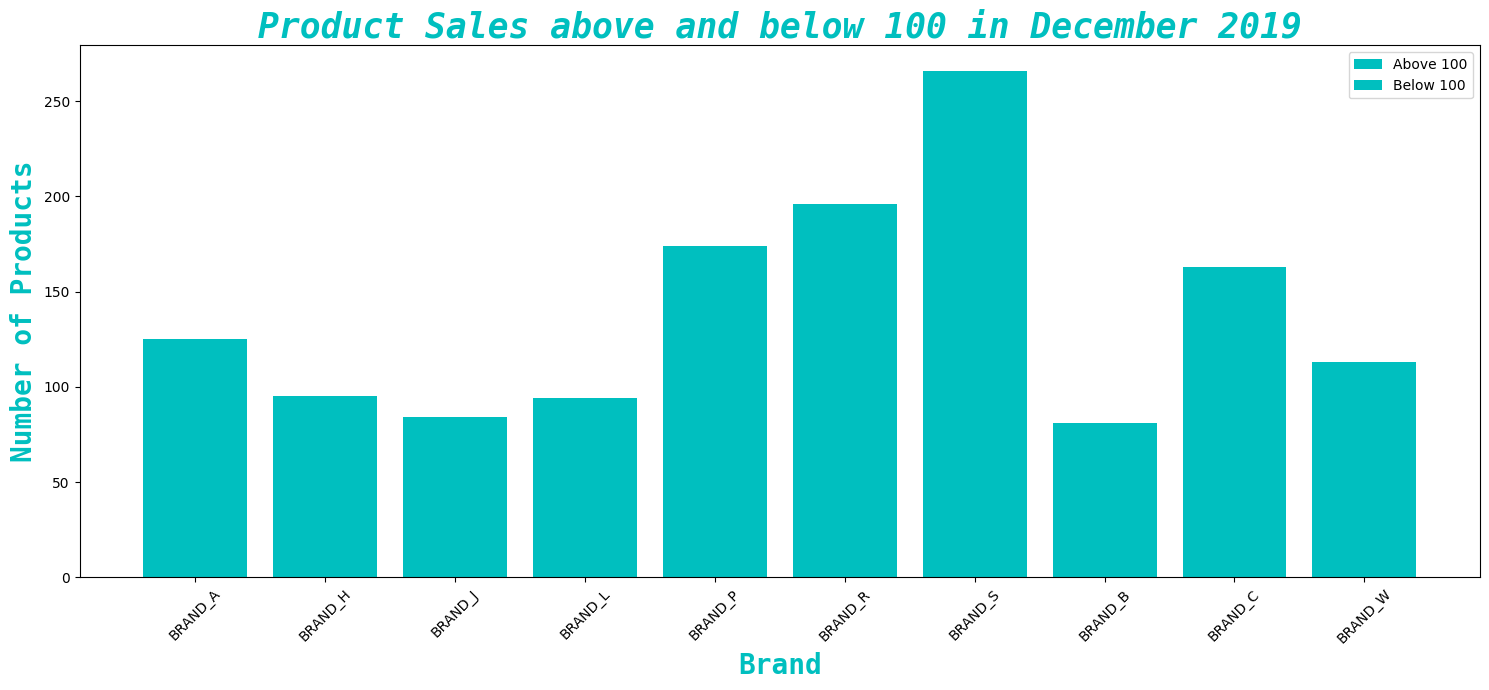

In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv')
df['order_date'] = pd.to_datetime(df['order_date'])
df['order_month'] = df['order_date'].dt.to_period('M')
df_december = df[df['order_month'] == '2019-12']
daily_customers = df_december.groupby('order_date')['customer_id'].nunique()
dec_data = df[(df['order_date'].dt.year == 2019) & (df['order_date'].dt.month == 12)]

top5_brands = dec_data.groupby('brand')['quantity'].sum().nlargest(5)
dataset_top5brand_dec = dec_data[dec_data['brand'].isin(top5_brands.index)]

above_100 = dec_data[dec_data['quantity'] >= 100]
below_100 = dec_data[dec_data['quantity'] < 100]

above_100_count = above_100.groupby('brand')['product_id'].count()
below_100_count = below_100.groupby('brand')['product_id'].count()

plt.figure(figsize=(15, 7))
plt.bar(above_100_count.index, above_100_count.values, label='Above 100', color='c')
plt.bar(below_100_count.index, below_100_count.values, label='Below 100', color='c')
plt.title('Product Sales above and below 100 in December 2019', fontstyle='oblique', fontsize=25, color='c', weight='semibold', family='monospace')
plt.xlabel('Brand', fontsize=20, color='c', weight='heavy', family='monospace')
plt.ylabel('Number of Products', fontsize=20, color='c', weight='heavy', family='monospace')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

CASE 5

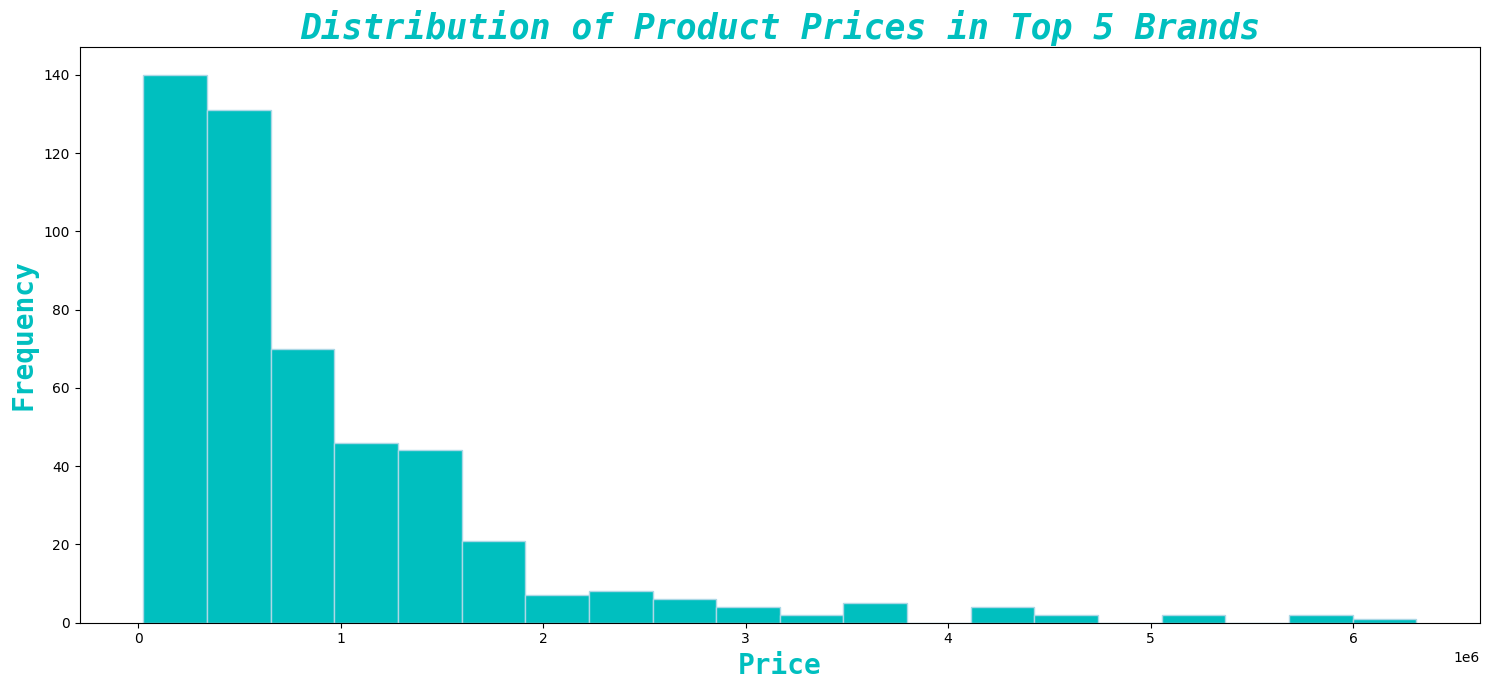

In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv')

top5_brand_median_prices = dataset_top5brand_dec.groupby('product_id')['item_price'].median()

plt.figure(figsize=(15, 7))
plt.hist(top5_brand_median_prices, bins=20, edgecolor='lightblue', color='c')
plt.title('Distribution of Product Prices in Top 5 Brands', fontstyle='oblique', fontsize=25, color='c', weight='semibold', family='monospace')
plt.xlabel('Price', fontsize=20, color='c', weight='heavy', family='monospace')
plt.ylabel('Frequency', fontsize=20, color='c', weight='heavy', family='monospace')
plt.tight_layout()
plt.show()

CASE 6A

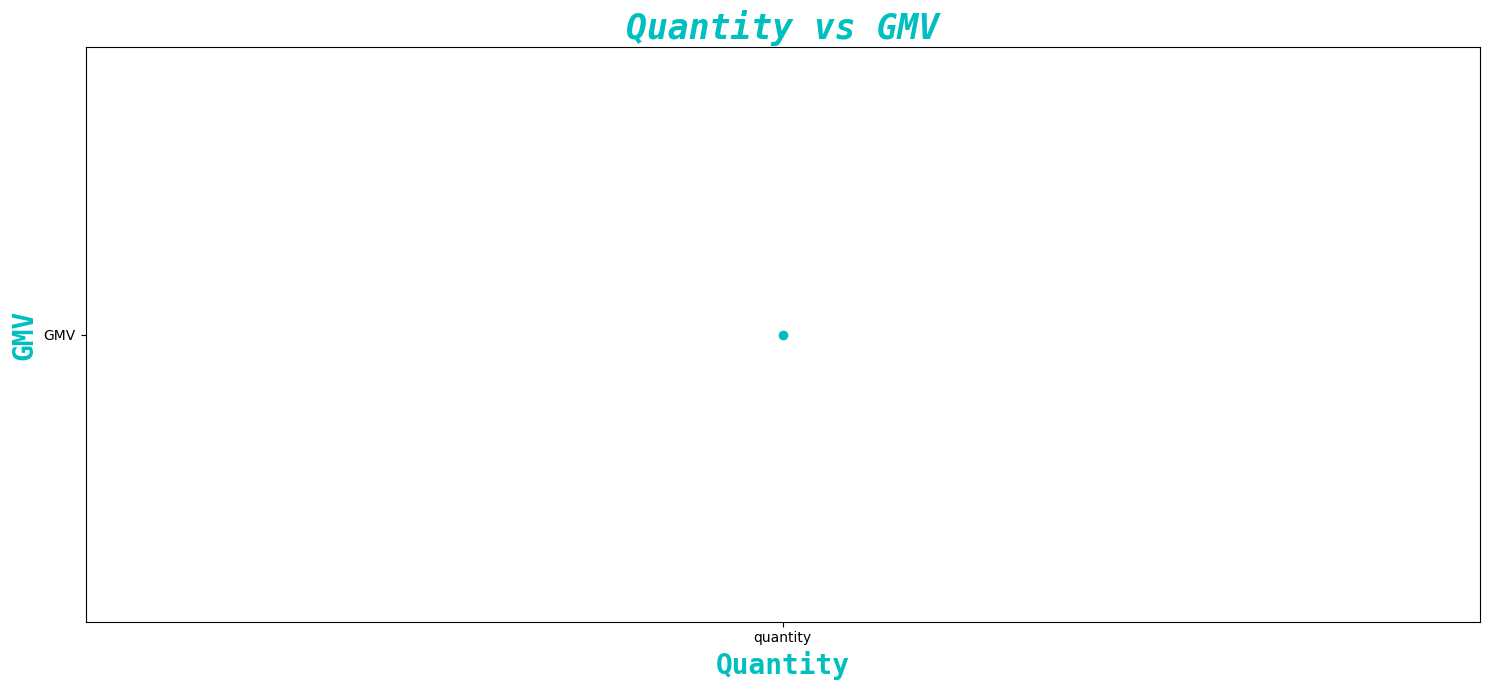

In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv')

unique_products = df.drop_duplicates(subset='product_id')
product_data = df.groupby('product_id').agg({'quantity': 'sum', 'item_price': 'median'})

plt.figure(figsize=(15, 7))
plt.scatter(data=product_data, x=['quantity'], y=['GMV'], color='c')
plt.title('Quantity vs GMV', fontstyle='oblique', fontsize=25, color='c', weight='semibold', family='monospace')
plt.xlabel('Quantity', fontsize=20, color='c', weight='heavy', family='monospace')
plt.ylabel('GMV', fontsize=20, color='c', weight='heavy', family='monospace')
plt.tight_layout()
plt.show()

CASE 6B

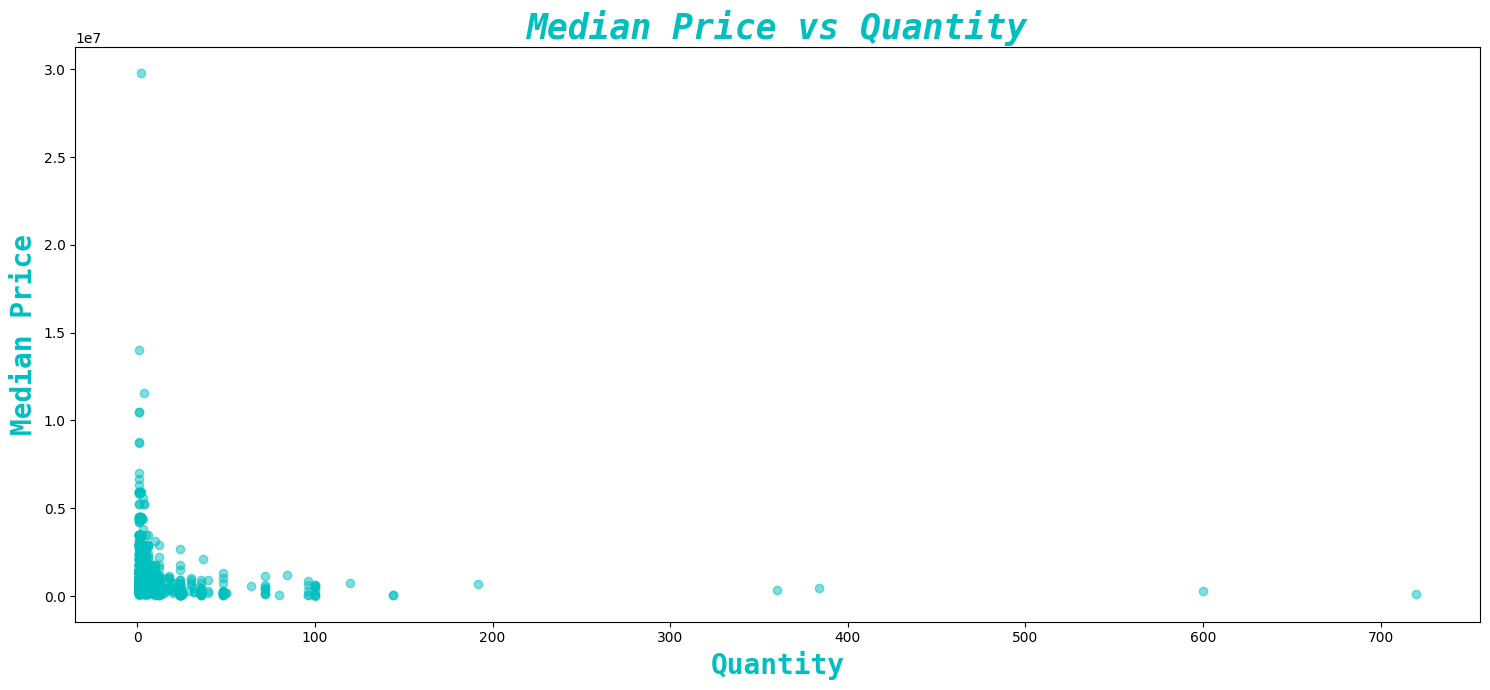

In [ ]:
unique_products = df.drop_duplicates(subset='product_id')

plt.figure(figsize=(15, 7))
plt.scatter(unique_products['quantity'], unique_products['item_price'], alpha=0.5, color='c')
plt.title('Median Price vs Quantity', fontstyle='oblique', fontsize=25, color='c', weight='semibold', family='monospace')
plt.xlabel('Quantity', fontsize=20, color='c', weight='heavy', family='monospace')
plt.ylabel('Median Price', fontsize=20, color='c', weight='heavy', family='monospace')
plt.tight_layout()
plt.show()